# Child Age 2-17 Data Visualization II

In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

# 1.Data

In [2]:
child = pd.read_csv(r"child data.csv")
#first few rows
child.head()

LN  UF1  UF2  UF4  UF5  UF7Y  UF10  UF17  UB2  UB6  ...  UCF2  UCF3  UCF4  \
0   2    1   18    1  207  2017     1     1   11    1  ...     2     2     2   
1   3    1    9    2  203  2017     1     1    4    1  ...     2     2     2   
2   3    1   11    2  207  2017     1     1   12    1  ...     2     2     2   
3   3    1   14    2  203  2017     2     3    2    3  ...     2     2     2   
4   4    1    7    2  207  2017     1     1   12    1  ...     2     2     2   

   UCF7  UCF11  chweight  caretakerdis  cdisability  mlevel  UCD2B  
0     1      2      4.92             2            2       0      2  
1     1      2      1.68             2            2       2      2  
2     1      2      3.28             2            1       1      2  
3     2      3      0.00             7            2       0      1  
4     1      3      1.64             7            2       1      2  

[5 rows x 31 columns]

# 2. Data Manipulation

In [6]:
#Data Manipulation

#Replacing spaces with null values in total UF5 column
child['UF5']=child["UF5"].replace(" ",np.nan)
#Dropping null values from UFINT column which contain .15% missing data 
child = child[child["UF5"].notnull()]
child = child.reset_index()[child.columns]
#convert to float type
child["UF5"] =child["UF5"].astype(float)
#replace values

#Seprating Normal and Abnormal Behavior of child
Abnormal =child[child["UCD2B"] == 1]
normal =child[child["UCD2B"] ==2]
#Separating catagorical and numerical features
Id_col = ['UF1']
target_col = ["UCD2B"]
cat_cols = child.nunique()[child.nunique() < 6].keys().tolist()
cat_cols = [x for x in cat_cols if x not in target_col]
num_cols = [x for x in child.columns if x not in cat_cols + target_col + Id_col]

# 3. Exploratory Data Analysis

### 3.2. Varibles distribution in child behavior data

In [7]:
#function  for pie plot for child behavior types
def plot_pie(column) :
    
    trace1 = go.Pie(values  = Abnormal[column].value_counts().values.tolist(),
                    labels  = Abnormal[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Abnormal Behavior",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = normal[column].value_counts().values.tolist(),
                    labels  = normal[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Normal Behavior" 
                   )


    layout = go.Layout(dict(title = column + " distribution in child behavior ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "Normal",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Abnormal",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)


#function  for histogram for customer attrition types
def histogram(column) :
    trace1 = go.Histogram(x  = normal[column],
                          histnorm= "percent",
                          name = "Normal Behavior",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = Abnormal[column],
                          histnorm = "percent",
                          name = "Abnormal Behavior",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in child behavior ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    
#for all categorical columns plot pie
for i in cat_cols :
    plot_pie(i)

### 3.3. Child Behavior on AGE  groups

In [8]:
#child behavior in age  groups
tg_ch  =  normal["UB2"].value_counts().reset_index()
tg_ch.columns  = ["UB2","count"]
tg_nch =  Abnormal["UB2"].value_counts().reset_index()
tg_nch.columns = ["UB2","count"]

#bar - normal
trace1 = go.Bar(x = tg_ch["UB2"]  , y = tg_ch["count"],
                name = "Normal Behavior ",
                marker = dict(line = dict(width = .5,color = "black")),
                opacity = .9)

#bar - abnormal
trace2 = go.Bar(x = tg_nch["UB2"] , y = tg_nch["count"],
                name = "Abnormal Behavior",
                marker = dict(line = dict(width = .5,color = "black")),
                opacity = .9)

layout = go.Layout(dict(title = "Child behavior in age group",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Age group",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "count",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                       )
                  )
data = [trace1,trace2]
fig  = go.Figure(data=data,layout=layout)
py.iplot(fig)

# 4. Data preprocessing

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#customer id col
Id_col     = ['UF1']
#Target columns
target_col = ["UCD2B"]
#categorical columns
cat_cols   = child.nunique()[child.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [i for i in child.columns if i not in cat_cols + target_col + Id_col]
#Binary columns with 2 values
bin_cols   = child.nunique()[child.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]
#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    child[i] = le.fit_transform(child[i])
   #Duplicating columns for multi value columns
    child = pd.get_dummies(data = child,columns = multi_cols )
   #Scaling Numerical columns
    std = StandardScaler()
    scaled = std.fit_transform(child[num_cols])
    scaled = pd.DataFrame(scaled,columns=num_cols) 
    #dropping original values merging scaled values for numerical columns
df_child_og = child.copy()
child = child.drop(columns = num_cols,axis = 1)
child= child.merge(scaled,left_index=True,right_index=True,how = "left")

### 3.7. Variable Summary

In [11]:
summary = (df_child_og[[i for i in df_child_og.columns if i not in Id_col]].
           describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]

trace  = go.Table(header = dict(values = summary.columns.tolist(),
                                line = dict(color = ['#506784']),
                                fill = dict(color = ['#119DFF']),
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ['#506784']),
                                fill = dict(color = ["lightgrey",'#F5F8FF'])
                               ),
                  columnwidth = [200,60,100,100,60,60,80,80,80])
layout = go.Layout(dict(title = "Variable Summary"))
figure = go.Figure(data=[trace],layout=layout)
py.iplot(figure)

### 3.8. Correlation Matrix

In [12]:
#correlation
correlation = child.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

### 3.9. Visualising data with principal components

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X = child[[i for i in child.columns if i not in Id_col + target_col]]
Y = child[target_col + Id_col]

principal_components = pca.fit_transform(X)
pca_data = pd.DataFrame(principal_components,columns = ["PC1","PC2"])
pca_data = pca_data.merge(Y,left_index=True,right_index=True,how="left")
pca_data["UCD2B"] = pca_data["UCD2B"].replace({1:"Abnormal Behavior",0:"Normal Behavior"})

def pca_scatter(target,color) :
    tracer = go.Scatter(x = pca_data[pca_data["UCD2B"] == target]["PC1"] ,
                        y = pca_data[pca_data["UCD2B"] == target]["PC2"],
                        name = target,mode = "markers",
                        marker = dict(color = color,
                                      line = dict(width = .5),
                                      symbol =  "diamond-open"),
                        
                       )
    return tracer

layout = go.Layout(dict(title = "Visualising data with principal components",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "principal component 1",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "principal component 2",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        height = 600
                       )
                  )
trace1 = pca_scatter("Abnormal Behavior",'red')
trace2 = pca_scatter("Normal Behavior",'royalblue')
data = [trace2,trace1]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

#### 3.10. Binary variables distribution in child behavior (Radar Chart)

In [14]:
#separating binary columns
bi_cs = child.nunique()[child.nunique() == 2].keys()
dat_rad = child[bi_cs]

#plotting radar chart for normal and abnormal child(binary variables)
def plot_radar(df,aggregate,title) :
    data_frame = df[df["UCD2B"] == aggregate] 
    data_frame_x = data_frame[bi_cs].sum().reset_index()
    data_frame_x.columns  = ["feature","yes"]
    data_frame_x["no"]    = data_frame.shape[0]  - data_frame_x["yes"]
    data_frame_x  = data_frame_x[data_frame_x["feature"] != "UCD2B"]
    
    #count of 1's(yes)
    trace1 = go.Scatterpolar(r = data_frame_x["yes"].values.tolist(),
                             theta = data_frame_x["feature"].tolist(),
                             fill  = "toself",name = "count of 1's",
                             mode = "markers+lines",
                             marker = dict(size = 5)
                            )
    #count of 0's(No)
    trace2 = go.Scatterpolar(r = data_frame_x["no"].values.tolist(),
                             theta = data_frame_x["feature"].tolist(),
                             fill  = "toself",name = "count of 0's",
                             mode = "markers+lines",
                             marker = dict(size = 5)
                            ) 
    layout = go.Layout(dict(polar = dict(radialaxis = dict(visible = True,
                                                           side = "counterclockwise",
                                                           showline = True,
                                                           linewidth = 2,
                                                           tickwidth = 2,
                                                           gridcolor = "white",
                                                           gridwidth = 2),
                                         angularaxis = dict(tickfont = dict(size = 10),
                                                            layer = "below traces"
                                                           ),
                                         bgcolor  = "rgb(243,243,243)",
                                        ),
                            paper_bgcolor = "rgb(243,243,243)",
                            title = title,height = 700))
    
    data = [trace2,trace1]
    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig)

#plot
plot_radar(dat_rad,1,"Normal -  Child")
plot_radar(dat_rad,0,"Abnormal - Child")

# 5. Model Building

#### 5.1. Baseline Model

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold

In [17]:
#splitting train and test data 
train,test = train_test_split(child,test_size = .25 ,random_state = 111)
    
##seperating dependent and independent variables
cols    = [i for i in child.columns if i not in Id_col + target_col]
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]

In [18]:
def child_behavior_prediction(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf,threshold_plot) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Abnormal","Normal"],
                        y = ["Abnormal","Normal"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot coeffs
    trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

 Classification report : 
               precision    recall  f1-score   support

           0       0.75      0.87      0.80     10357
           1       0.63      0.43      0.51      5272

    accuracy                           0.72     15629
   macro avg       0.69      0.65      0.66     15629
weighted avg       0.71      0.72      0.71     15629

Accuracy   Score :  0.7211593831979013
Area under curve :  0.6503375492636694 



C:\miniconda\envs\venv\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



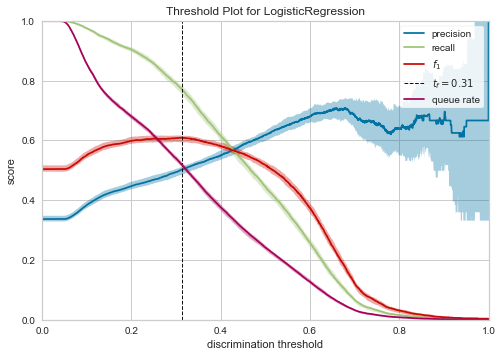

In [19]:
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
child_behavior_prediction(logit,train_X,test_X,
                             train_Y,test_Y,cols,"coefficients",threshold_plot = True)

## 5.2. Synthetic Minority Oversampling TEchnique (SMOTE)
* Randomly pick a point from the minority class.
* Compute the k-nearest neighbors (for some pre-specified k) for this point.
* Add k new points somewhere between the chosen point and each of its neighbors

In [21]:
from imblearn.over_sampling import SMOTE

cols    = [i for i in child.columns if i not in Id_col+target_col]

smote_X = child[cols]
smote_Y = child[target_col]

os = SMOTE(random_state = 0)
os_smote_X ,os_smote_Y = os.fit_resample(smote_X ,smote_Y)
#Split train and test data
smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(os_smote_X,os_smote_Y,
                                                                         test_size = .25 ,
                                                                         random_state = 111)
#oversampling minority class using smote
os_smote_X = pd.DataFrame(data = os_smote_X ,columns =cols)
os_smote_Y = pd.DataFrame(data = os_smote_Y ,columns =target_col)

In [22]:
#threshold_plot - if True returns threshold plot for model
def child_behavior_prediction_alg(algorithm,training_x,testing_x,
                                 training_y,testing_y,threshold_plot = True) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Abnormal","Normal"],
                        y = ["Abnormal","Normal"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic'
                                            ))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9 , metric = 'minkowski' ,p = 1)

In [ ]:
child_behavior_prediction_alg(knn,os_smote_X,smote_test_X,
                             os_smote_Y,smote_test_Y,threshold_plot = True)

KNeighborsClassifier(n_neighbors=9, p=1)

 Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.78      0.82     10229
           1       0.80      0.87      0.83     10474

    accuracy                           0.83     20703
   macro avg       0.83      0.83      0.83     20703
weighted avg       0.83      0.83      0.83     20703

Accuracy   Score :  0.825822344587741
Area under curve :  0.825296005043787 



C:\miniconda\envs\venv\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
child_behavior_prediction(logit,os_smote_X,smote_test_X,os_smote_Y,
                            smote_test_Y,cols,"coefficients",threshold_plot = True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=4 ,random_state=0)

In [ ]:
child_behavior_prediction_alg(rf,os_smote_X,smote_test_X,
                             os_smote_Y,smote_test_Y,threshold_plot = True)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(criterion='entropy' ,max_depth=1)
AdaBoost = AdaBoostClassifier(base_estimator=model ,n_estimators=400 ,learning_rate = 1)

In [ ]:
child_behavior_prediction_alg(AdaBoost,os_smote_X,smote_test_X,
                             os_smote_Y,smote_test_Y,threshold_plot = True)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(priors=None)

In [ ]:
child_behavior_prediction_alg(gnb,os_smote_X,smote_test_X,
                             os_smote_Y,smote_test_Y,threshold_plot = True)

In [ ]:
from lightgbm import LGBMClassifier

lgbm_c = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                        learning_rate=0.5, max_depth=7, min_child_samples=20,
                        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
                        n_jobs=-1, num_leaves=500, objective='binary', random_state=None,
                        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
                        subsample_for_bin=200000, subsample_freq=0)

In [ ]:
child_behavior_prediction_alg(lgbm_c,os_smote_X,smote_test_X,
                             os_smote_Y,smote_test_Y,threshold_plot = True)

### 5.3. Recursive Feature Elimination

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [ ]:
from sklearn.feature_selection import RFE

logit = LogisticRegression()

rfe = RFE(logit,10)
rfe = rfe.fit(os_smote_X,os_smote_Y.values.ravel())

rfe.support_
rfe.ranking_

#identified columns Recursive Feature Elimination
idc_rfe = pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" : [i for i in child.columns if i not in Id_col + target_col],
                       "ranking" : rfe.ranking_,
                      })
cols = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()


#separating train and test data
train_rf_X = os_smote_X[cols]
train_rf_Y = os_smote_Y
test_rf_X  = test[cols]
test_rf_Y  = test[target_col]

logit_rfe = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
#applying model
child_behavior_prediction(logit_rfe,train_rf_X,test_rf_X,train_rf_Y,test_rf_Y,
                         cols,"coefficients",threshold_plot = True)

tab_rk = ff.create_table(idc_rfe)
py.iplot(tab_rk)

### 5.4. Univariate Selection
Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
uses the chi squared (chi^2) statistical test for non-negative features to select the best features

### 5.5. Decision Tree Visualization
Using top three numerical feature

In [ ]:
cat_cols   = child.nunique()[child.nunique() < 6].keys().tolist()
features_cat  = child[child[cat_cols] == "Categorical"][:3].keys().tolist()
features_num  = child[child[num_cols] == "Numerical"][:3].keys().tolist()

# KNN Classifiers

* Apply kNN classifier over smote sample

In [ ]:
def child_behavior_prediction_alg(algorithm,training_x,testing_x,
                                 training_y,testing_y,threshold_plot = True) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy Score   : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc)
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
     
    #plot roc curve
    trace1 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2),
                       )
    trace2 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot confusion matrix
    trace3 = go.Heatmap(z = conf_matrix ,x = ["Wrong Behavior","True Behavior"],
                        y = ["Wrong Behavior","True Behavior"],
                        showscale  = False,colorscale = "Blues",name = "matrix",
                        xaxis = "x2",yaxis = "y2"
                       )
    
    layout = go.Layout(dict(title="Model performance" ,
                            autosize = False,height = 500,width = 800,
                            showlegend = False,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(title = "false positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         domain=[0, 0.6],
                                         ticklen=5,gridwidth=2),
                            yaxis = dict(title = "true positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         zerolinewidth=1,
                                         ticklen=5,gridwidth=2),
                            margin = dict(b=200),
                            xaxis2=dict(domain=[0.7, 1],tickangle = 90,
                                        gridcolor = 'rgb(255, 255, 255)'),
                            yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
                           )
                  )
    data = [trace1,trace2,trace3]
    fig = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()

    
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=1,
           weights='uniform')
child_behavior_prediction_alg(knn,os_smote_X,test_X,
                             os_smote_Y,test_Y,threshold_plot = True)

## 5.5. Decision Tree Visualization
Using top three numerical features

### 5.7. Vizualising a decision tree from random forest classifie

## 5.8. A random forest classifier

* A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement .
* Below are the trees produced by random forest model with 10 estimated trees with maximum depth of three for each tree. Each tree produced is slightly different from other.

In [ ]:
#making 10 trees with random forest for columns 
#selected from recursive feature elimination

n = np.arange(0,10).tolist()
cols = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist() 
for i in n :
    plot_tree_randomforest(cols,10,i,3,"gini",model_performance=False)

## 5.10. Support Vector Machine

* “Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space .where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes

# END